In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/StudentsPerformance.csv')

# 데이터 확인

In [2]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df['total score'] = df['math score'] + df['writing score'] + df['reading score']

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


# gender

In [10]:
df['gender'].value_counts() 

female    518
male      482
Name: gender, dtype: int64

In [11]:
df['gender'].value_counts() / len(df)

female    0.518
male      0.482
Name: gender, dtype: float64

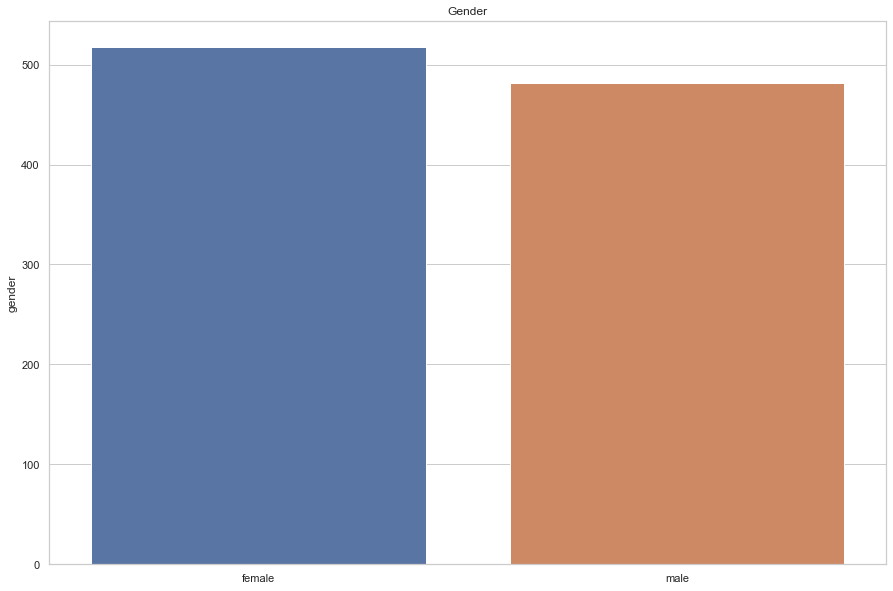

In [12]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))
ax=sns.barplot(x=df['gender'].value_counts().index,y=df['gender'].value_counts())
plt.title('Gender')
plt.show()

성비는 약 52:48 어느 정도 균형을 이룬다.

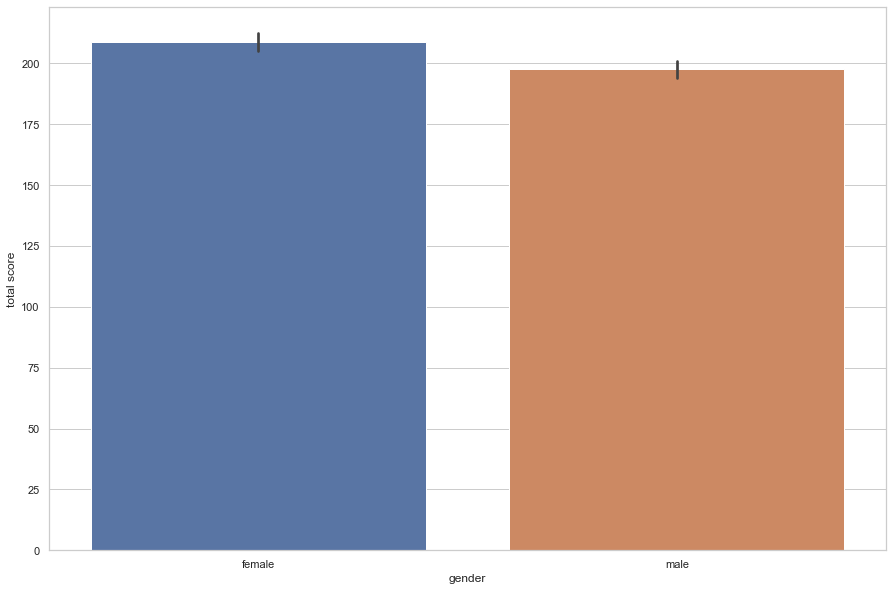

In [13]:
plt.figure(figsize=(15, 10))
sns.barplot(x = "gender", y = "total score", data = df)
plt.show()

여학생들의 총점 평균이 남학생들보다 높다.

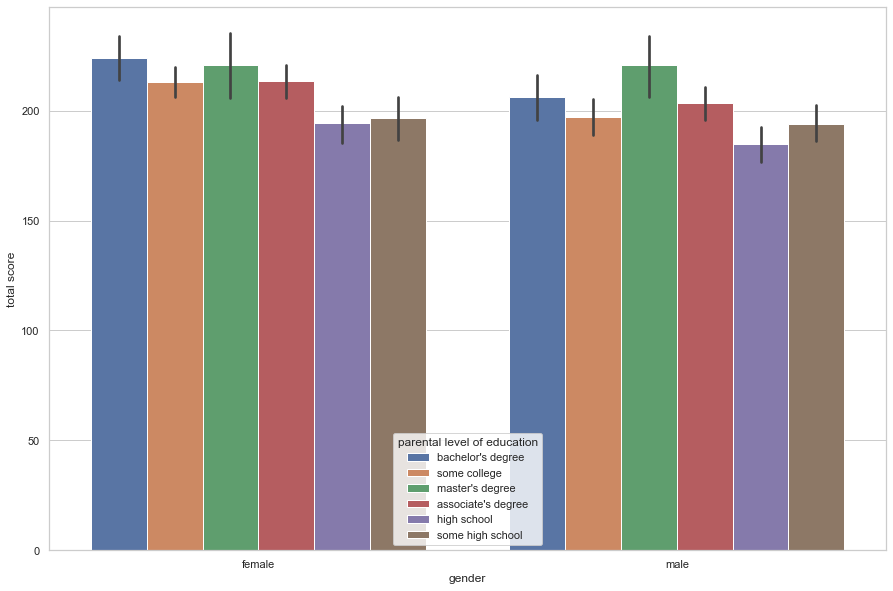

In [14]:
plt.figure(figsize=(15, 10))
sns.barplot(x = "gender", y = "total score", hue = 'parental level of education' , data = df)
plt.show()

In [15]:
df.corr()

,math score,reading score,writing score,total score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total score,0.918746,0.970331,0.965667,1.000000


In [16]:
df[df['gender'] == 'female'].corr()

,math score,reading score,writing score,total score
math score,1.000000,0.909254,0.920729,0.968082
reading score,0.909254,1.000000,0.954725,0.977335
writing score,0.920729,0.954725,1.000000,0.981894
total score,0.968082,0.977335,0.981894,1.000000


In [17]:
df[df['gender'] == 'male'].corr()

,math score,reading score,writing score,total score
math score,1.000000,0.885489,0.891973,0.955845
reading score,0.885489,1.000000,0.950627,0.974806
writing score,0.891973,0.950627,1.000000,0.977290
total score,0.955845,0.974806,0.977290,1.000000


수학, 독해, 작문 점수는 매우 높은 상관관계를 보인다.  
미세하지만 여학생들의 점수에서의 상관관계가 조금 더 높은 수준.

# race/ethnicity

In [18]:
df['race/ethnicity'].value_counts() 

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

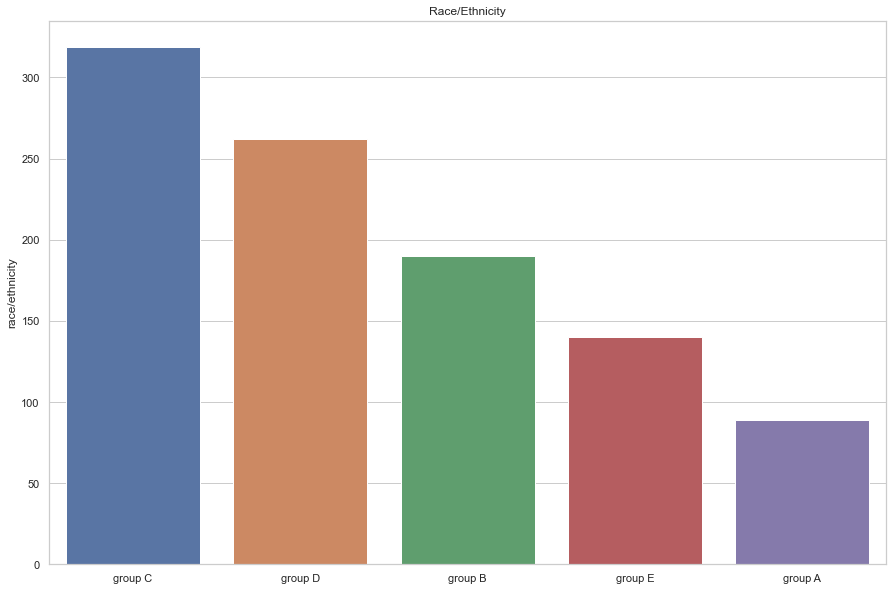

In [19]:
plt.figure(figsize=(15, 10))
ax=sns.barplot(x=df['race/ethnicity'].value_counts().index,y=df['race/ethnicity'].value_counts())
plt.title('Race/Ethnicity')
plt.show()

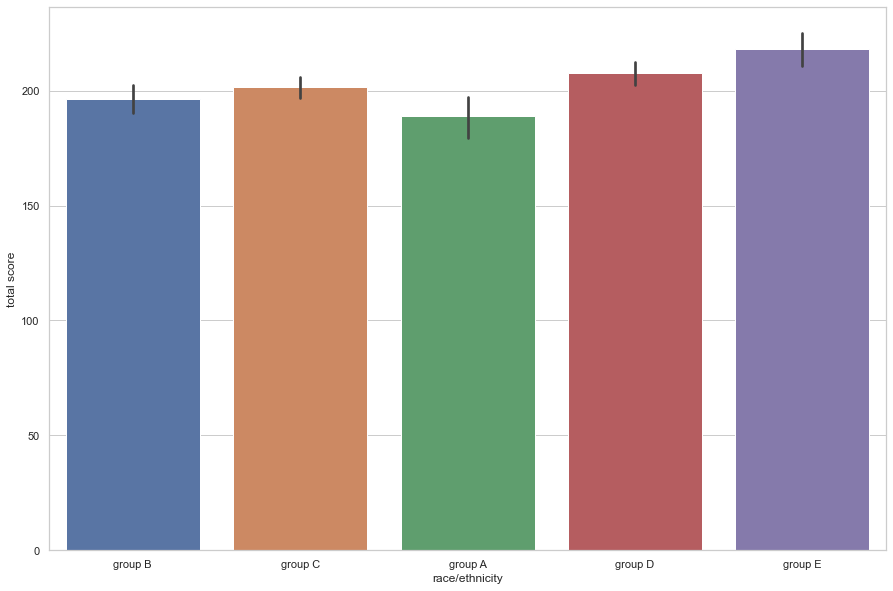

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(x = "race/ethnicity", y = "total score", data = df)
plt.show()

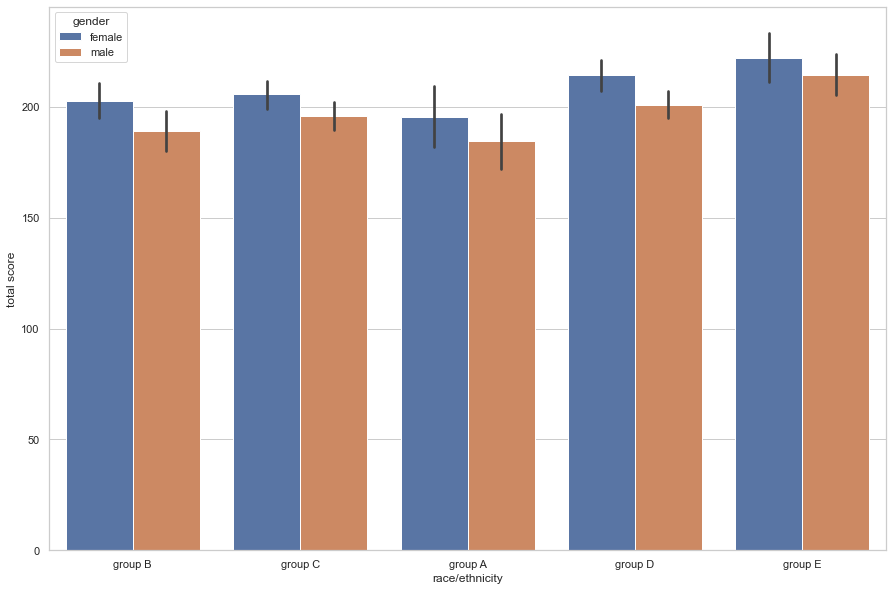

In [21]:
plt.figure(figsize=(15, 10))
sns.barplot(x = "race/ethnicity", y = "total score", hue = "gender", data = df)
plt.show()

모든 인종 그룹에서 여학생들의 총점 평균이 높으며, E 그룹의 점수가 가장 좋다.

# parental level of education

In [22]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

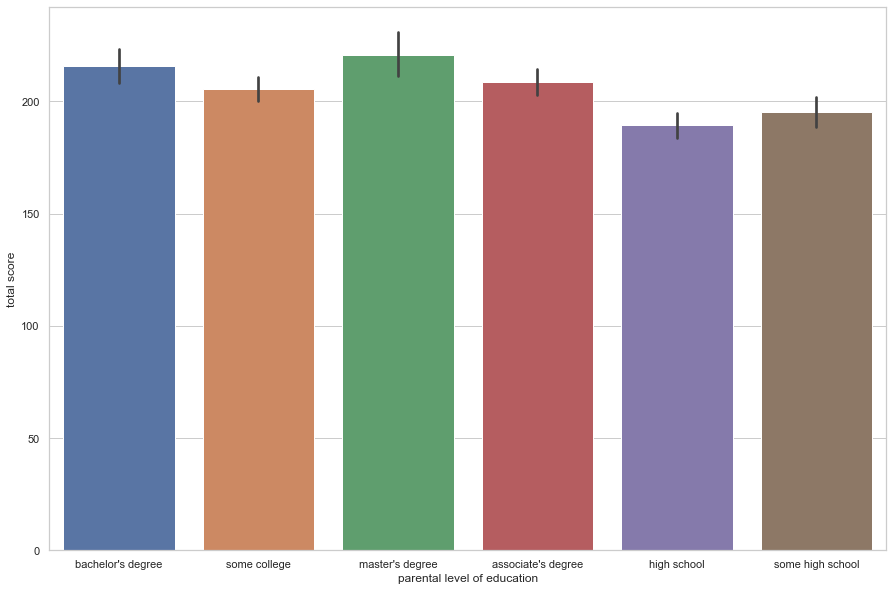

In [23]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'parental level of education', y = "total score", data = df)
plt.show()

In [24]:
df.loc[df['parental level of education'] == 'some high school', 'parental level of education'] = 0
df.loc[df['parental level of education'] == 'high school', 'parental level of education'] = 1
df.loc[df['parental level of education'] == "associate's degree", 'parental level of education'] = 2
df.loc[df['parental level of education'] == "some college", 'parental level of education'] = 3
df.loc[df['parental level of education'] == "bachelor's degree", 'parental level of education'] = 4
df.loc[df['parental level of education'] == "master's degree", 'parental level of education'] = 5

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,4,standard,none,72,72,74,218
1,female,group C,3,standard,completed,69,90,88,247
2,female,group B,5,standard,none,90,95,93,278
3,male,group A,2,free/reduced,none,47,57,44,148
4,male,group C,3,standard,none,76,78,75,229


In [26]:
df.corr()

,math score,reading score,writing score,total score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total score,0.918746,0.970331,0.965667,1.000000


# lunch

In [27]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

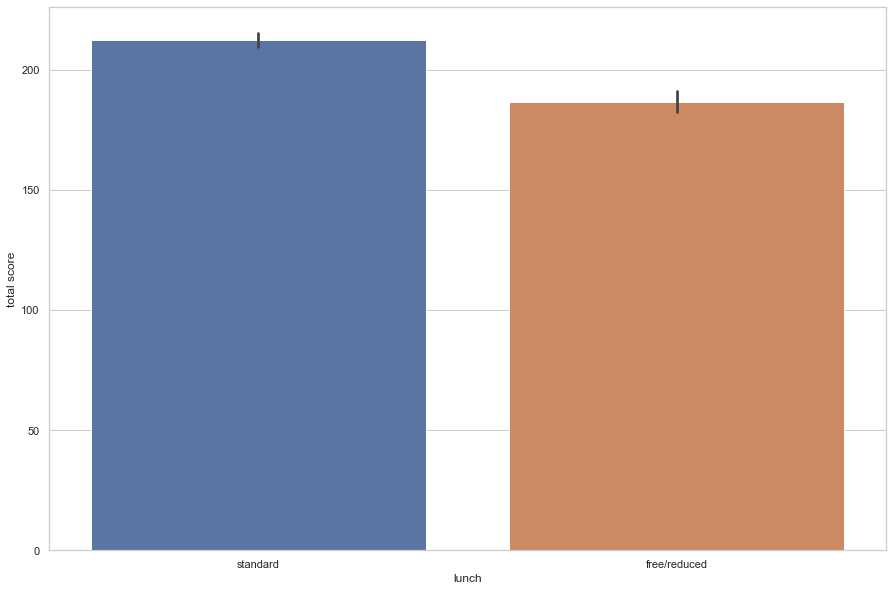

In [28]:
plt.figure(figsize=(15, 10))
sns.barplot(x = "lunch", y = "total score", data = df)
plt.show()

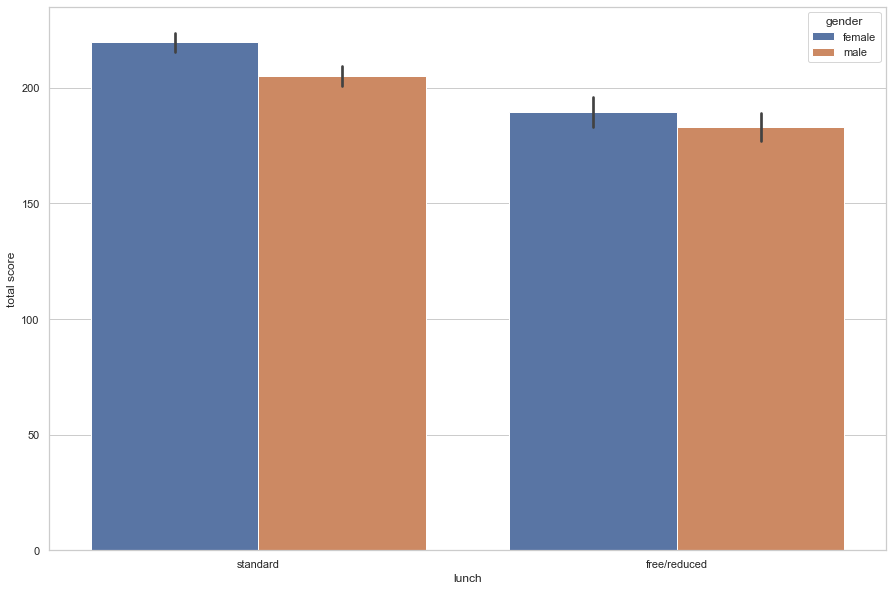

In [29]:
plt.figure(figsize=(15, 10))
sns.barplot(x = "lunch", y = "total score",hue = 'gender', data = df)
plt.show()

점심을 먹는 학생들의 평균 총점이 먹지 않거나 덜 먹는 학생들보다 높다.  
점심을 잘먹자...!

# scores

In [30]:
df['total score'].describe()

count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: total score, dtype: float64

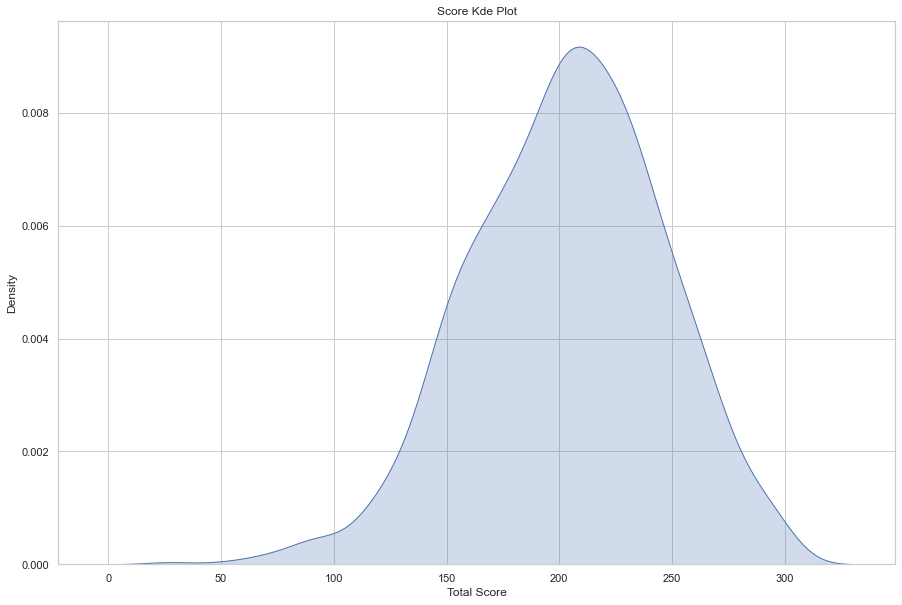

In [31]:
plt.figure(figsize=(15, 10))
sns.kdeplot(data=df['total score'], shade = True)
plt.xlabel('Total Score')
plt.title('Score Kde Plot')
plt.show()

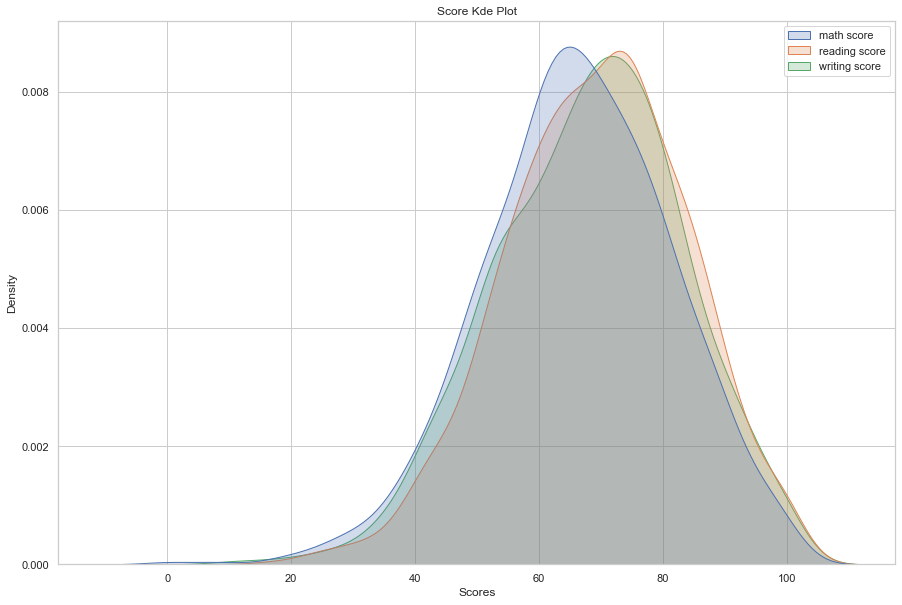

In [32]:
plt.figure(figsize=(15, 10))
sns.kdeplot(data = df[['math score', 'reading score', 'writing score']], shade = True)
plt.xlabel('Scores')
plt.title('Score Kde Plot')
plt.show()